# Semana 4: Special applications: Face recognition & Neural style transfer

## Face recognition

Very commun use of CNN, usually associated with liveness detection to spot fake faces (ex: photographs). Usually you only have one image of each face, in a database like employees database, so you need to perform **one shot learning**.


### One Shot Learning

The standard aproach with CNN would be feed it with the images of the employees and train it to given face is output who's face is it, employeee1, 2, 3, ... or not an employee. But that would hardly work on only one image of each person and would need to train the NN every time a new person is added. 
Another option is to train a CNN to lean a **similarity function**. This way the CNN will learn to compare the images of the database and the input images to tell how different they are.

$d(img1, img2) =$ degree of difference betwwen images

If $d(img1, img2) <= \sigma$ is the same person

$d(img1, img2) > \sigma$ not the same person

## Siamese Network

This NN takes 2 images $x^{(1)}$ and $x^{(2)}$ and runs each of them separately outputing the encodes $f(x^{(1)})$ and $f(x^{(2)})$. It's made of convolutional layers and fully connected layers.


Then it calculates 

$d(x^{(1)}, x^{(2)}) = ||f(x^{(1)}) - f(x^{(2)})||^2$ 

and learn parameters so $d$ is close to 1 or 0 depending if it is or not the same person. One way to learn the parameters is to apply gradient descent one the Triplet Loss function. Another way is to do it as a binary classification problem.

### Triplet Loss function

When running siamese networks the input will always be an anchor image $(A)$ and a comparing image wich can be a positive image $(P)$ or negatve image $(N)$. So given 3 images (a triplet) it calculates $L(A, P, N)$

We want $d(A, P) <= d(A, N)$

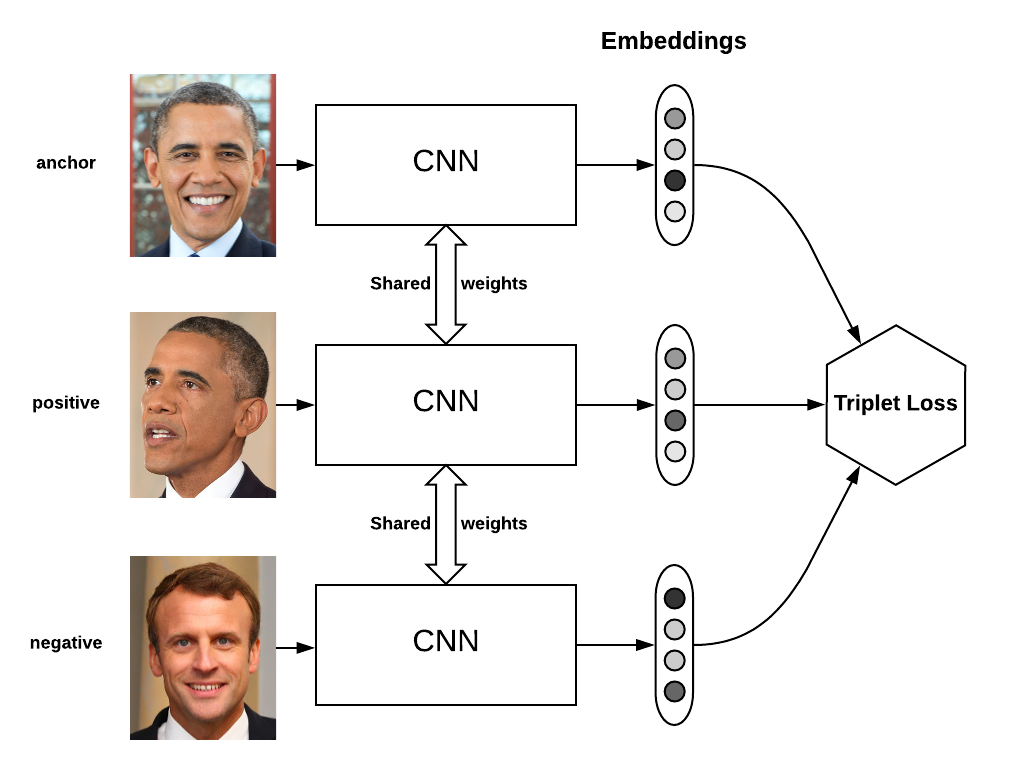

To prevent the NN from zeroing all encodings or outputing the same encode for all images, we add a margin $\alpha$. By doing this $d(A, (P)$ and $d(A, N)$ go further away from each other.

$d(A, P) - d(A, N) + \alpha <= 0$

$$L = max(d(A, P) - d(A, N) + \alpha,  0)$$

$$J = \sum_{i = 1}^{m} L(A^{(i)}, P^{(i)}, N^{(i)})$$

It's important to chose triplets in a way they are not to easy. Usually companies train these NN on with datasets of milions of exemples, many of these put their parameters online. 

### Binary Classification

Take the pictures in pairs, and for each pair a label 0 for same person or 1 to different person. After the foraward prop, compute

$\hat{y} = \sigma(\sum_{k = 1}^{m} w_k *|f(x^{(1)})_k - f(x^{(2)})_k | +b)$

Could also be

$\hat{y} = \sigma(\sum_{k = 1}^{m} w_k *\frac{(f(x^{(1)})_k - f(x^{(2)})_k)^2}{(f(x^{(1)})_k + f(x^{(2)})_k)} +b)$

Then aply gradient descent.

## Neural Style Transfer

Very cool use uf CNN.

Given a content image C and a style image S it generates a G image.
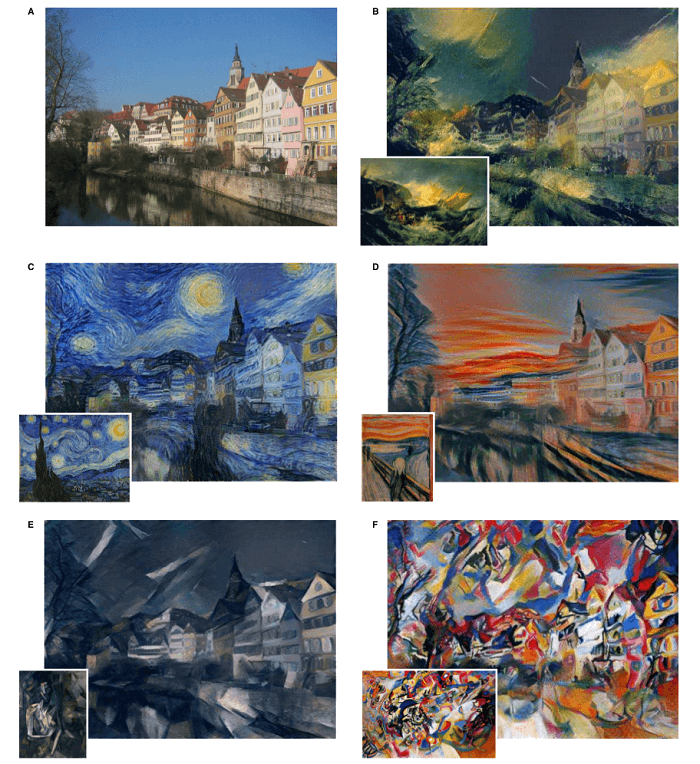

### What are deep ConvNets learning?

By looking at wich features in images make a hidden unit activation the highest, we can tell what's that hidden unit looking for.

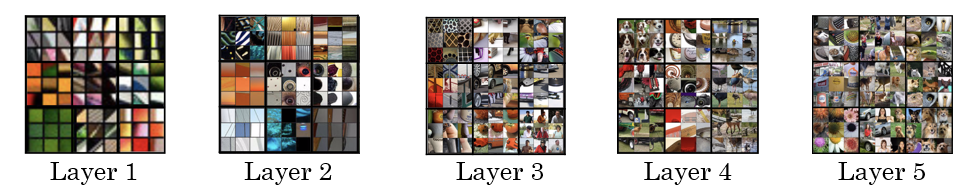

In this exemple, for each layer there are exemples of 9 different neurons and 9 images that activated each of them.

### Cost 

The cost function $J(G)$ is divided in 2 parts. One related to content and the other to style.

$$J(G) = \alpha*J_c(C, G) + \beta*J_s(S, G)$$

1- Initialize $G$ randomly

2- Use gradient descent to minimize $J(G)$

#### Content cost

#### Style cost

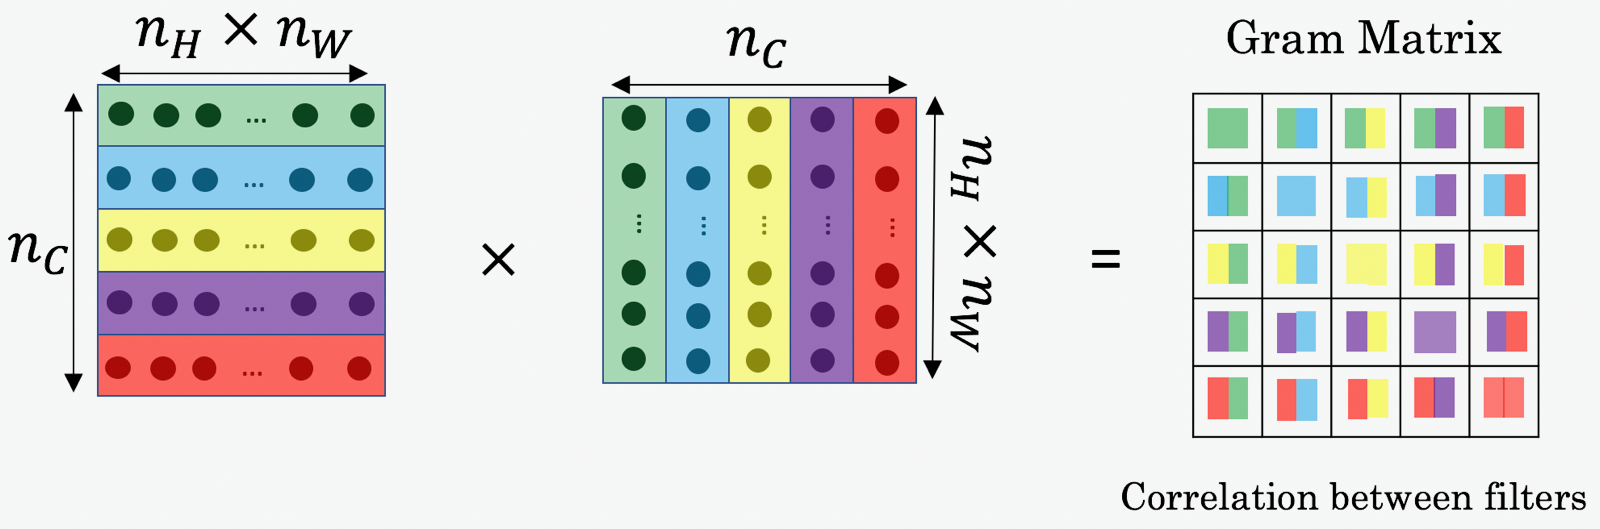 

$$J_s^{[l]}(S, G) = ||G^{[l](s)} - G^{[l](g)}||^2_F$$

Results are more visualy pleasing if the style cost is made out of multiple layers.

$$J_s(S, G) = \sum_{l} \lambda^{[l]}*J_s^{[l]}(S, G) $$

### Related / interesting papers:

- Mathew Zeiler and Rob Fergus., 2013, Visualizing and understanding convolutional networks

- Gatys et al., 2015. A neural algorithm of artistic style